# Stroke Prediction Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv(r"C:\Users\super\Software\Mega\Academics\5th sem labs\DS Lab\stroke.csv")

#### First 8 records:

In [4]:
df.head(8)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1


In [5]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
df.shape[0]

5110

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


### Mean, Median and Mode for all numeric attributes:

In [8]:
df.mean(numeric_only=True)

id                   36517.829354
age                     43.226614
hypertension             0.097456
heart_disease            0.054012
avg_glucose_level      106.147677
bmi                     28.893237
stroke                   0.048728
dtype: float64

In [9]:
df.median(numeric_only=True)

id                   36932.000
age                     45.000
hypertension             0.000
heart_disease            0.000
avg_glucose_level       91.885
bmi                     28.100
stroke                   0.000
dtype: float64

In [10]:
mode = df.mode()
mode.loc[0]

id                             67
gender                     Female
age                          78.0
hypertension                  0.0
heart_disease                 0.0
ever_married                  Yes
work_type                 Private
Residence_type              Urban
avg_glucose_level           93.88
bmi                          28.7
smoking_status       never smoked
stroke                        0.0
Name: 0, dtype: object

In [11]:
df.select_dtypes(include='number')

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,NaN,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1
...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,NaN,0
5106,44873,81.0,0,0,125.20,40.0,0
5107,19723,35.0,0,0,82.99,30.6,0
5108,37544,51.0,0,0,166.29,25.6,0


#### Checking for null/missing values:

In [12]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

#### Dropping the rows with null **bmi** values:

In [13]:
df.dropna(axis=0, inplace=True)

In [14]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#### Resetting the index after removal of tuples:

In [15]:
df.reset_index(drop=True,inplace=True)

In [16]:
df.shape

(4909, 12)

#### Dropping duplicates:

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.shape

(4909, 12)

>Dataset had no duplicates

### Scatter plot of any 2 columns:

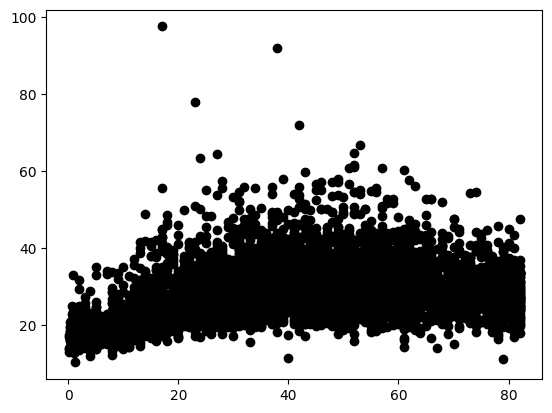

In [291]:
plt.scatter(df['age'], df['bmi'], c="Black")

In [292]:
df1 = df

### Grouping data by on basis of one column and displaying number of records in each group

#### A. Using categorical label

In [293]:
smoker = df.groupby('smoking_status')
smoker.size()

smoking_status
Unknown            1483
formerly smoked     837
never smoked       1852
smokes              737
dtype: int64

#### B. Using numerical data and converting to categorical and then gropuing

In [294]:
bins = [0, 18.5, 25, 30, 100]  
labels = ['UnderWeight', 'Healthy', 'OverWeight', 'Obese']
bmi_category = pd.cut(x = df['bmi'], bins=bins, labels=labels)

In [295]:
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [296]:
bmi_category.value_counts()

Obese          1893
OverWeight     1409
Healthy        1258
UnderWeight     349
Name: bmi, dtype: int64

## Data Visualization

In [297]:
numerical = ['age', 'avg_glucose_level', 'bmi']

### Correlation Heatmap:

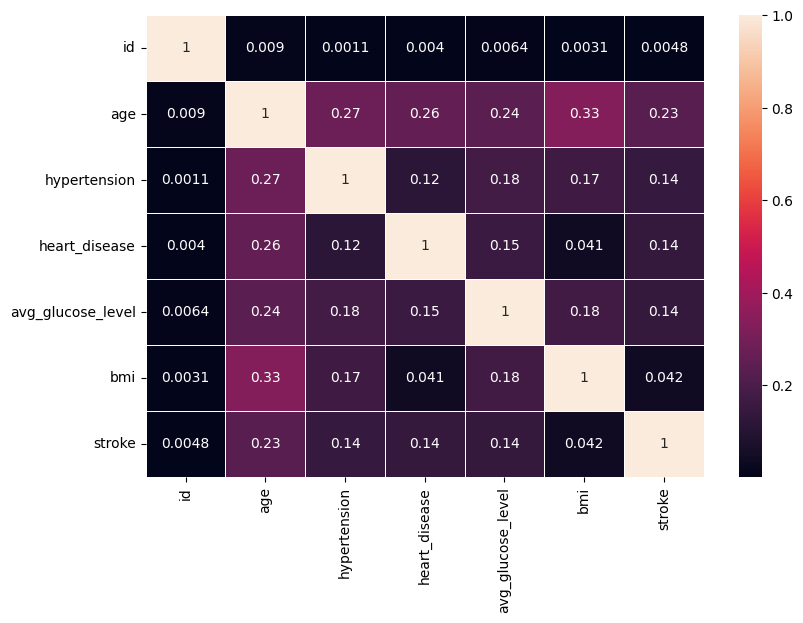

In [298]:
corr = df.corr()
fig = plt.figure(figsize=(9, 6))
ax = sns.heatmap(corr, annot=True, linewidths=.5)
plt.show()

>Correlation Heatmap indicates **low** collinearity between attributes

#### Box Plot:

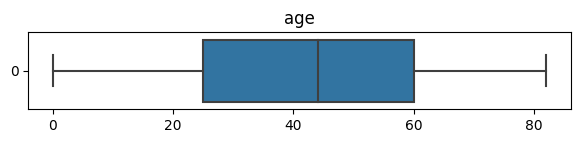

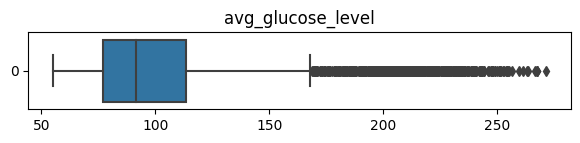

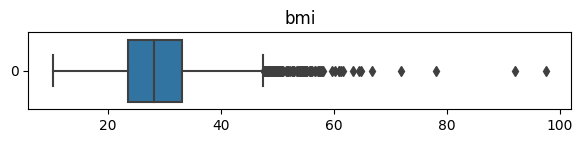

In [299]:
for j,i in enumerate(numerical) :
    plt.figure(figsize=(7,1))
    sns.boxplot(df[i], orient='h')
    plt.title(i)
    plt.show()

>BoxPlot indicates huge number of outliers present for "bmi" and "avg_glucose_level" attributes

#### Function to calculate Upper and Lower Limit of data (according to box plot) to find out outliers:

In [300]:
def find_outliers_IQR(data, name):
   q1 = np.percentile(data, 25, interpolation = 'midpoint') 
   q3 = np.percentile(data, 75, interpolation = 'midpoint') 
   IQR=q3-q1
   lowerlim = q1 - 1.5 * IQR
   upperlim = q3 + 1.5 * IQR
   outliers = data[((data < lowerlim) | (data>upperlim))]
   print(f'Variable Names :{name}')
   print(f'Number of Outliers : {len(outliers)}')
   print(f'Lower Limit Values : {lowerlim}')
   print(f'Upper Limit Values : {upperlim}')

In [301]:
find_outliers_IQR(df['bmi'], 'bmi')

Variable Names :bmi
Number of Outliers : 110
Lower Limit Values : 9.099999999999998
Upper Limit Values : 47.5


C:\Users\super\AppData\Local\Temp\ipykernel_13172\327235984.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q1 = np.percentile(data, 25, interpolation = 'midpoint')
C:\Users\super\AppData\Local\Temp\ipykernel_13172\327235984.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q3 = np.percentile(data, 75, interpolation = 'midpoint')


In [302]:
find_outliers_IQR(df['avg_glucose_level'], 'glucose level')

Variable Names :glucose level
Number of Outliers : 567
Lower Limit Values : 22.319999999999993
Upper Limit Values : 168.32


C:\Users\super\AppData\Local\Temp\ipykernel_13172\327235984.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q1 = np.percentile(data, 25, interpolation = 'midpoint')
C:\Users\super\AppData\Local\Temp\ipykernel_13172\327235984.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q3 = np.percentile(data, 75, interpolation = 'midpoint')


### Handling Outliers:
> Using median imputation for outliers (replacing outlying value with median value)

In [303]:
data = df

In [304]:
bmi_median = df['bmi'].median()

In [305]:
glucose_median = df['avg_glucose_level'].median()

In [306]:
data['bmi'].loc[(df_new['bmi'] > 46.29) | (data['bmi'] < 10.30)] = bmi_median
data['bmi'].loc[(df_new['avg_glucose_level'] > 169.35) | (data['avg_glucose_level'] < 21.98)] = glucose_median

C:\Users\super\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### Encoding:
We convert categorical variables into Numeric

In [307]:
from sklearn.preprocessing import LabelEncoder  

lb=LabelEncoder()

data['gender'] = lb.fit_transform(data['gender'])
data['ever_married'] = lb.fit_transform(data['ever_married'])
data['work_type'] = lb.fit_transform(data['work_type'])
data['Residence_type'] = lb.fit_transform(data['Residence_type'])
data['smoking_status'] = lb.fit_transform(data['smoking_status'])

data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,91.68,1,1
1,31112,1,80.0,0,1,1,2,0,105.92,32.50,2,1
2,60182,0,49.0,0,0,1,2,1,171.23,91.68,3,1
3,1665,0,79.0,1,0,1,3,0,174.12,91.68,2,1
4,56669,1,81.0,0,0,1,2,1,186.21,91.68,1,1


### Separating features from target variable:

In [308]:
X = data.drop(['stroke'], axis=1).values  #Features
y = data['stroke'].values #target variable

### Scaling the data:

In [309]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [310]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

### Splitting the data for training and testing:

In [311]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Model Training
ML algo used: Support Vector Machine (SVM)

In [312]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', gamma=0.2)
classifier.fit(X_train, y_train)

SVC(gamma=0.2)

### Model Testing:

In [313]:
y_pred = classifier.predict(X_test)

### Creating a confusion matrix and calculating accuracy score:

In [315]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm,'\n')

#Applying k-fold cross validation:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X = X_train, y = y_train)
print(f'Accuracy: {round(accuracies.mean()*100,2)}%')

Confusion Matrix:
[[939   0]
 [ 43   0]] 

Accuracy: 95.77%


### Conclusion:
Required tasks have been performed on the dataset and the dataset was used to train SVM Algorithm. Confusion Matrix for the classification results was also created. 